In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


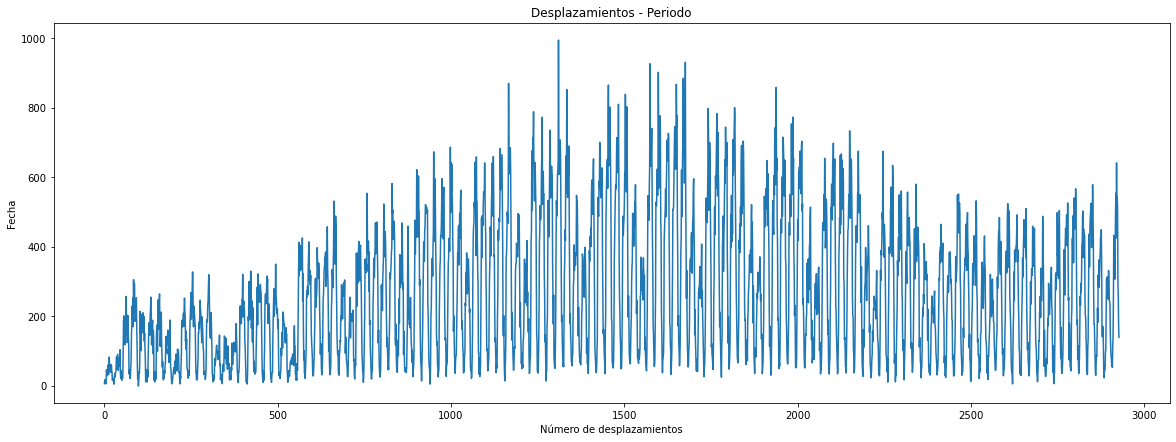

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [7]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoDesescalada = Periodo1.loc[mask]

## Nueva normalidad: 9 Junio - 31 Agosto

In [8]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoNnormalidad = Periodo1.loc[mask]

In [9]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)
def est_Martes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 1)
def est_Miercoles(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 2)
def est_Jueves(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 3)
def est_Viernes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 4)
def est_Sabado(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5)
def est_Domingo(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 6)

PeriodoDesescalada['Lunes'] = PeriodoDesescalada['ds'].apply(est_Lunes)
PeriodoNnormalidad['Lunes'] = PeriodoNnormalidad['ds'].apply(est_Lunes)

PeriodoDesescalada['Martes'] = PeriodoDesescalada['ds'].apply(est_Martes)
PeriodoNnormalidad['Martes'] = PeriodoNnormalidad['ds'].apply(est_Martes)

PeriodoDesescalada['Miercoles'] = PeriodoDesescalada['ds'].apply(est_Miercoles)
PeriodoNnormalidad['Miercoles'] = PeriodoNnormalidad['ds'].apply(est_Miercoles)

PeriodoDesescalada['Jueves'] = PeriodoDesescalada['ds'].apply(est_Jueves)
PeriodoNnormalidad['Jueves'] = PeriodoNnormalidad['ds'].apply(est_Jueves)

PeriodoDesescalada['Viernes'] = PeriodoDesescalada['ds'].apply(est_Viernes)
PeriodoNnormalidad['Viernes'] = PeriodoNnormalidad['ds'].apply(est_Viernes)

PeriodoDesescalada['Sabado'] = PeriodoDesescalada['ds'].apply(est_Sabado)
PeriodoNnormalidad['Sabado'] = PeriodoNnormalidad['ds'].apply(est_Sabado)

PeriodoDesescalada['Domingo'] = PeriodoDesescalada['ds'].apply(est_Domingo)
PeriodoNnormalidad['Domingo'] = PeriodoNnormalidad['ds'].apply(est_Domingo)

/tmp/ipykernel_5666/3002591399.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes'] = PeriodoDesescalada['ds'].apply(est_Lunes)
/tmp/ipykernel_5666/3002591399.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes'] = PeriodoNnormalidad['ds'].apply(est_Lunes)
/tmp/ipykernel_5666/3002591399.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [10]:
PeriodoDesescalada = PeriodoDesescalada.set_index('ds')
PeriodoNnormalidad = PeriodoNnormalidad.set_index('ds')

In [11]:
#Desescalada
train_end_D = datetime.datetime(2020,6,7,23,0,0)
test_end_D = datetime.datetime(2020,6,8,23,0,0)

train_data_D = PeriodoDesescalada[:train_end_D]
test_data_D = PeriodoDesescalada[train_end_D + timedelta(hours=1):test_end_D]

#Nueva Normalidad
train_end_N = datetime.datetime(2020,8,30,23,0,0)
test_end_N = datetime.datetime(2020,8,31,23,0,0)

train_data_N = PeriodoNnormalidad[:train_end_N]
test_data_N = PeriodoNnormalidad[train_end_N + timedelta(hours=1):test_end_N]

In [12]:
train_data_D = train_data_D.reset_index()
train_data_N = train_data_N.reset_index()

test_data_D = test_data_D.reset_index()
test_data_N = test_data_N.reset_index()

# Desescalada

## Aplicamos Rolling Forecasting para evaluación del modelo

In [13]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_D.copy()   # El problema es en history   
    
    for t in range(len(test_data_D)):        
        m = Prophet()          
#         m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='Lunes_season', period=1, fourier_order=5, condition_name='Lunes')
        m.add_seasonality(name='Martes_season', period=1, fourier_order=5, condition_name='Martes')
        m.add_seasonality(name='Miercoles_season', period=1, fourier_order=5, condition_name='Miercoles')
        m.add_seasonality(name='Jueves_season', period=1, fourier_order=5, condition_name='Jueves')
        m.add_seasonality(name='Viernes_season', period=1, fourier_order=5, condition_name='Viernes')
        m.add_seasonality(name='Sabado_season', period=1, fourier_order=5, condition_name='Sabado')
        m.add_seasonality(name='Domingo_season', period=1, fourier_order=5, condition_name='Domingo')
    
        
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')           
        
        future['Lunes'] = future['ds'].apply(est_Lunes)        
        future['Martes'] = future['ds'].apply(est_Martes)
        future['Miercoles'] = future['ds'].apply(est_Miercoles)
        future['Jueves'] = future['ds'].apply(est_Jueves)
        future['Viernes'] = future['ds'].apply(est_Viernes)
        future['Sabado'] = future['ds'].apply(est_Sabado)
        future['Domingo'] = future['ds'].apply(est_Domingo)
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_D[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_D[['ds','y','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.1681
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       1722.31   0.000236394       111.698   3.253e-06       0.001      149  LS failed, Hessian reset 
      99       1722.37   0.000109515       74.7301      0.4691      0.4691      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       1722.38   1.55702e-07       70.6126           1           1      224   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.3536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1724.81   7.97383e-05       81.0813           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       1724.82   0.000140039        74.654   1.756e-06       0.001      203  LS failed, Hessian reset 
     165       1724.83   1.28004e-07       79.9288           1           1      273   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -37.1258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1726.14     0.0011496        77.347           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       1726.15   0.000274759       90.1885   3.382e-06       0.001      166  LS failed, Hessian reset 
     163       1726.25    0.00101953       129.109   1.243e-05       0.001      275  LS failed, Hessian reset 
     199       1726.32   9.18855e-07       69.8814      0.4017           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       1726.32    1.3183e-07       74.7448      0.2885      0.2885      365   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -46.6063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74        1726.1    0.00284778       185.812   3.044e-05       0.001      131  LS failed, Hessian reset 
      99       1726.28   1.67915e-05       73.3009      0.2974           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       1726.32   6.71155e-07       67.6857   8.158e-09       0.001      302  LS failed, Hessian reset 
     181       1726.32   3.49299e-08       62.9332      0.1788           1      312   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -42.4919
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1727.49   1.56415e-06        77.183           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       1727.49   3.86314e-08       65.2616     0.05071      0.1843      152   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -41.078
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1729.01    0.00298186       63.8307           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1729.2   0.000147565       81.2452      0.9785      0.9785      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       1729.24   6.21135e-05       67.4208   7.539e-07       0.001      352  LS failed, Hessian reset 
     299       1729.25   1.57557e-07       72.7995      0.6582      0.6582      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       1729.25   4.50862e-07       72.3928           1           1      433   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -34.334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1730.19   0.000306292       69.1337      0.2597      0.2597      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       1730.34   0.000601414        151.36   4.806e-06       0.001      215  LS failed, Hessian reset 
     199       1730.41   9.76667e-06       63.1713      0.7865      0.7865      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       1730.41   4.25647e-07       72.4395     0.06935      0.9491      283   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -19.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1732.11      0.030862       325.546           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1733.17   4.13954e-05       67.9681   5.347e-07       0.001      261  LS failed, Hessian reset 
     187       1733.17   5.89755e-08       64.3635      0.2586           1      290   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -19.9561
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1733.99     0.0010519       66.6008      0.5949      0.5949      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       1735.65   0.000494902       98.0452    3.73e-06       0.001      185  LS failed, Hessian reset 
     199       1735.75   0.000116606        80.715           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     298       1735.78   3.31011e-05       72.7989   5.093e-07       0.001      436  LS failed, Hessian reset 
     299       1735.78   1.47948e-05       67.2103      0.9889      0.9889      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       1735.78   5.58797e-08       66.5635      0.2695           1      469   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -36.7092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1729.64    0.00588988       113.315      0.9681      0.2253      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1735.86   2.88189e-07       62.5151      0.3104      0.3104      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       1735.86    3.7551e-08       74.2381     0.04272           1      282   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -23.6717
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1735.17    0.00679943       173.358      0.6822      0.6822      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       1738.21   0.000274243       77.2164   3.273e-06       0.001      236  LS failed, Hessian reset 
     189       1738.23   1.47327e-05       82.9209   1.887e-07       0.001      317  LS failed, Hessian reset 
     199       1738.23   1.27068e-06        69.132       1.223      0.3166      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       1738.24   2.99353e-05       91.9335   3.694e-07       0.001      433  LS failed, Hessian reset 
     269       1738.24   1.72352e-07        68.344       0.332           1      467   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.3262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1735.5    0.00102755       79.8665       0.521       0.521      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1739.03   0.000797131       119.317   7.511e-06       0.001      238  LS failed, Hessian reset 
     199       1739.13   0.000401017       82.5336       0.165           1      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       1739.16    1.2971e-07       67.4985           1           1      374   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -31.5833
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1735.73    0.00510695       187.644      0.5596      0.5596      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       1739.79   0.000181267       56.0373   3.432e-06       0.001      241  LS failed, Hessian reset 
     199       1739.98    0.00179148       58.8479           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       1740.01   1.92167e-05       75.2178   3.423e-07       0.001      392  LS failed, Hessian reset 
     288       1740.01   1.27719e-07       64.6601      0.7244      0.7244      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -28.8285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1738.68    0.00123523       103.915           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       1741.69   0.000637366       126.547   8.969e-06       0.001      226  LS failed, Hessian reset 
     199       1741.84   1.90663e-05       62.8174     0.05877           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1741.91   3.77815e-05       77.9095           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     360       1741.92   2.81544e-06       72.9316   3.741e-08       0.001      531  LS failed, Hessian reset 
     371       1741.92   8.59531e-08       63.8812      0.9425      0.9425      547   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -62.1286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1786.9    0.00976931       119.828      0.5719      0.5719      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1795.16    0.00357837       92.7963           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       1795.33   0.000899123        191.28   7.731e-06       0.001      279  LS failed, Hessian reset 
     263       1795.92   7.55982e-08        64.973      0.5453      0.5453      356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -41.5163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1790.97    0.00421822       121.278      0.9636      0.9636      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       1796.08   0.000822128       169.798   7.608e-06       0.001      258  LS failed, Hessian reset 
     199       1796.65   0.000374406       72.4964       1.954      0.4732      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238        1796.7   5.32772e-05       61.0716   6.883e-07       0.001      397  LS failed, Hessian reset 
     299       1796.71   2.08257e-07       80.9887      0.7081      0.7081      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       1796.75   3.91048e-05       70.2791   6.078e-07       0.001      608  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -49.7578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1789.51    0.00115099       185.648      0.1343      0.1343      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       1794.23   0.000563433       115.519   6.843e-06       0.001      248  LS failed, Hessian reset 
     199       1794.37   0.000555688       82.2593      0.8363      0.8363      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       1794.96    0.00260109       282.383   3.199e-05       0.001      341  LS failed, Hessian reset 
     299       1795.39   9.40121e-06       82.2863      0.3138      0.3138      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317        1795.4   4.79444e-05       79.0871   5.808e-07       0.001      497  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.7929
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1792.18    0.00756262       180.671      0.1012      0.5486      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       1794.44   0.000830973        169.74   7.936e-06       0.001      198  LS failed, Hessian reset 
     189       1796.15   0.000738433       164.345   6.771e-06       0.001      306  LS failed, Hessian reset 
     199       1796.48     0.0004971       75.4242      0.3671      0.3671      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       1796.59   8.18331e-08       71.9492      0.5652      0.5652      387   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -25.4971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1795.54    0.00283883       94.0274      0.5253      0.5253      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       1798.66   0.000422858        90.853   4.667e-06       0.001      254  LS failed, Hessian reset 
     199       1798.68   7.43349e-07       72.3527      0.3848      0.3848      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1798.68   6.06123e-08       68.4642      0.4384           1      316   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -56.7511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1786.23     0.0462997       201.489           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       1790.07    0.00414287       238.624   2.421e-05       0.001      187  LS failed, Hessian reset 
     194       1792.18    0.00100134        150.18     1.4e-05       0.001      308  LS failed, Hessian reset 
     199       1792.31   0.000589312       59.6555      0.3532           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1792.56   7.84575e-08       72.1528      0.6418      0.6418      402   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -36.2025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       1787.35   0.000704792       147.842   4.776e-06       0.001      146  LS failed, Hessian reset 
      99       1788.41     0.0187495       195.965        8.98       0.898      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148        1790.7    0.00190867       249.456   1.435e-05       0.001      241  LS failed, Hessian reset 
     199       1792.05   7.78029e-05       72.2094       0.372           1      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       1792.58   0.000446755        94.186   5.615e-06       0.001      362  LS failed, Hessian reset 
     299       1792.97    1.1597e-07       78.8552      0.2541      0.2541      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -35.4529
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1787.37       0.01842        106.84           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       1792.08    0.00212166       81.3491   2.481e-05       0.001      255  LS failed, Hessian reset 
     188       1792.44   0.000229029       72.0658   2.732e-06       0.001      327  LS failed, Hessian reset 
     199       1792.45   9.32299e-06        75.298      0.8673      0.8673      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       1792.45   1.13805e-07       68.2702      0.3145           1      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -17.9195
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1794.18    0.00079569       84.3613      0.3294           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       1794.55   0.000834316       176.084   8.572e-06       0.001      223  LS failed, Hessian reset 
     199       1794.74   2.98401e-05       88.4608      0.9356      0.2084      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1794.79   2.91734e-06       74.8864           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1794.8   1.97388e-06       84.5235      0.5923      0.5923      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458        1794.8   6.95808e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -18.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1795.51    0.00174116       171.114           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       1796.36   0.000642122       113.485   7.081e-06       0.001      216  LS failed, Hessian reset 
     199       1796.67   8.03174e-06       71.8744           1           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       1796.67   3.65568e-09       71.7143     0.03905     0.03905      329   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1119824129.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

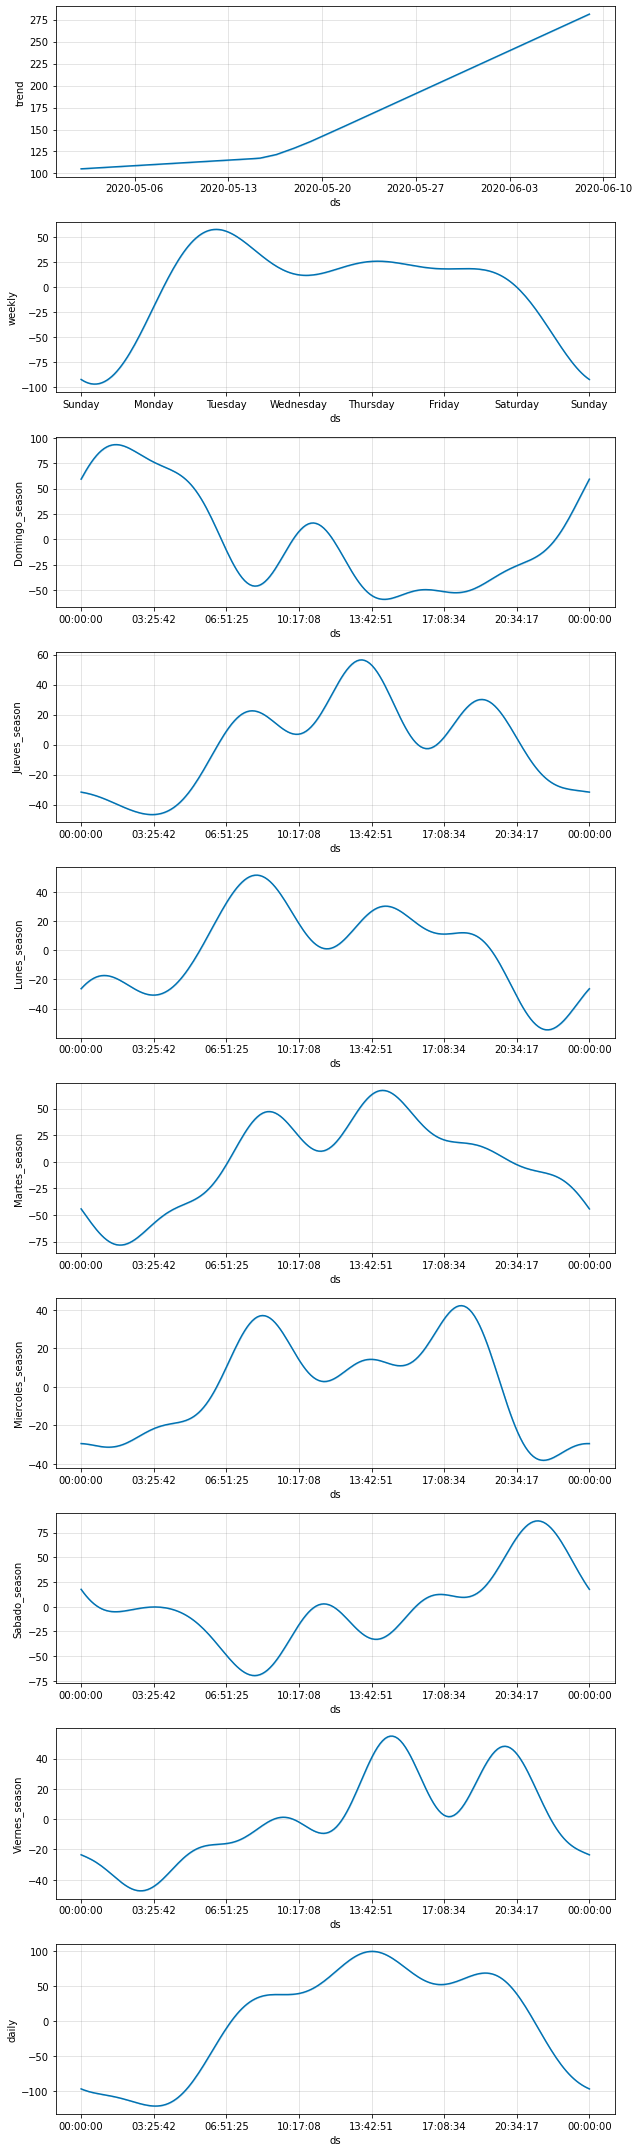

In [14]:
fig, predictions_rolling = rolling_forecast()

In [15]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_D = test_data_D.set_index('ds')

In [16]:
residuals_rolling = test_data_D['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-06-08 00:00:00,-26.097843
2020-06-08 01:00:00,-69.156642
2020-06-08 02:00:00,-115.137034
2020-06-08 03:00:00,-81.912206
2020-06-08 04:00:00,-80.380912


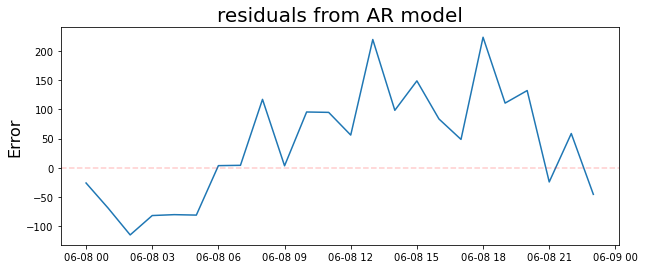

In [17]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

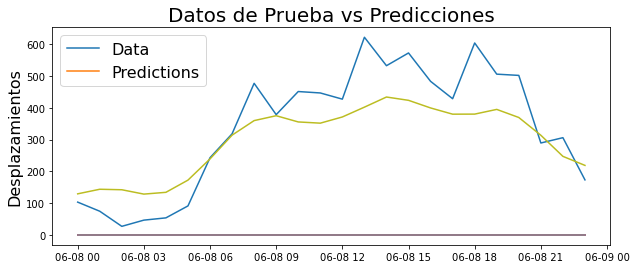

In [18]:
plt.figure(figsize=(10,4))
plt.plot(test_data_D)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [19]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_D['y'])),4))

Mean Absolute Percent Error: 0.538


# RMSE

In [20]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_D.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    101.931938
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


101.9319380817761

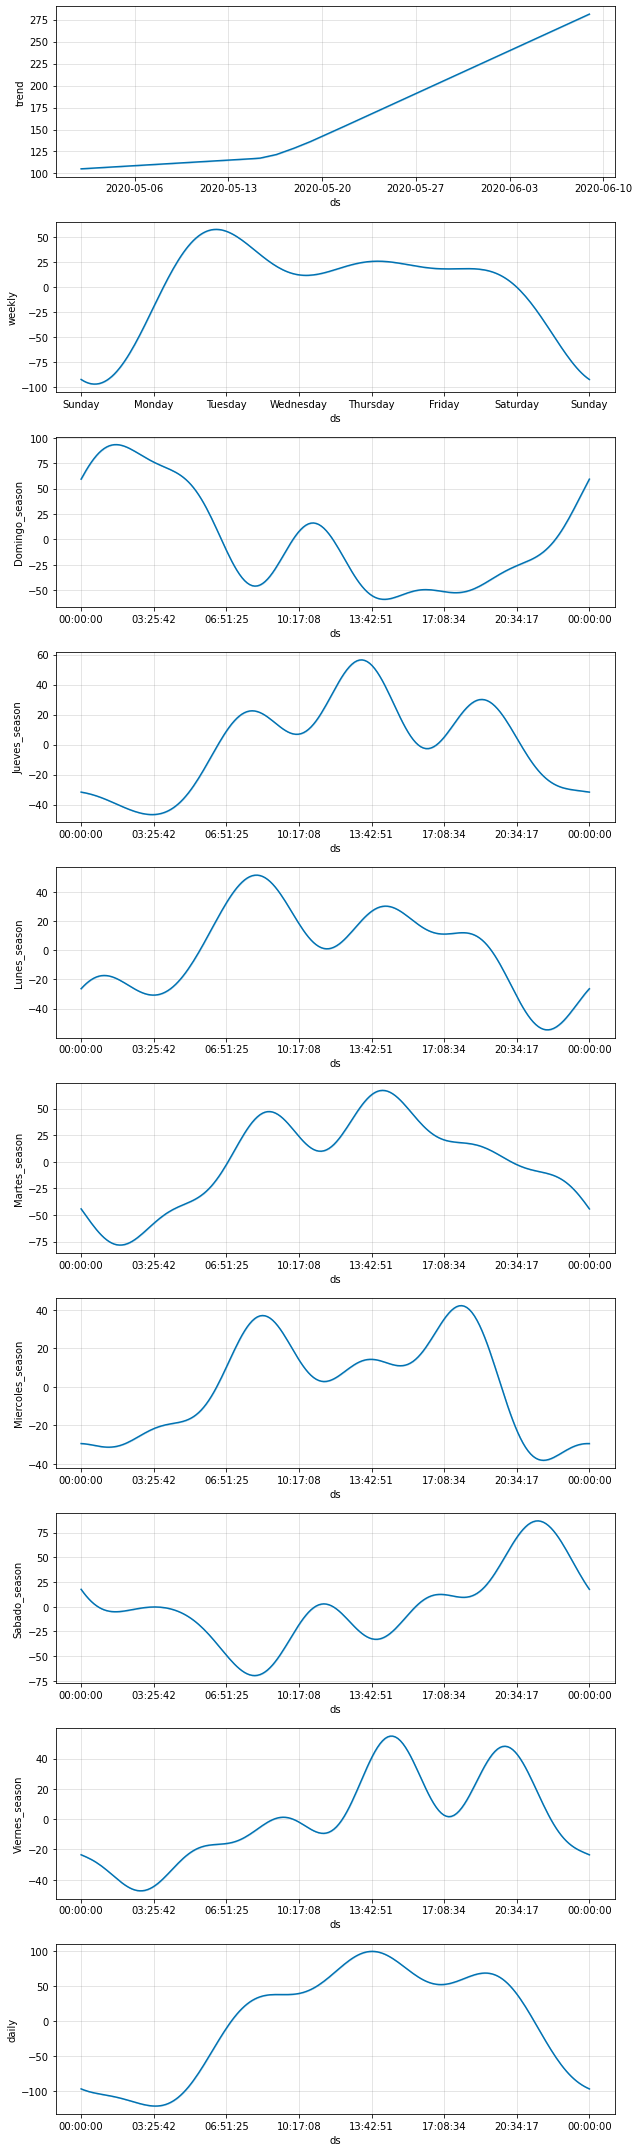

In [21]:
fig

In [22]:
#Reiniciamos
test_data_N = test_data_N.reset_index()

# Nueva Normalidad
## Aplicamos Rolling Forecasting para evaluación del modelo

In [23]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_N.copy()   # El problema es en history   
    
    for t in range(len(test_data_N)):        
        m = Prophet()
#         m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='Lunes_season', period=1, fourier_order=5, condition_name='Lunes')
        m.add_seasonality(name='Martes_season', period=1, fourier_order=5, condition_name='Martes')
        m.add_seasonality(name='Miercoles_season', period=1, fourier_order=5, condition_name='Miercoles')
        m.add_seasonality(name='Jueves_season', period=1, fourier_order=5, condition_name='Jueves')
        m.add_seasonality(name='Viernes_season', period=1, fourier_order=5, condition_name='Viernes')
        m.add_seasonality(name='Sabado_season', period=1, fourier_order=5, condition_name='Sabado')
        m.add_seasonality(name='Domingo_season', period=1, fourier_order=5, condition_name='Domingo')       
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')           
        
        future['Lunes'] = future['ds'].apply(est_Lunes)
        future['Martes'] = future['ds'].apply(est_Martes)
        future['Miercoles'] = future['ds'].apply(est_Miercoles)
        future['Jueves'] = future['ds'].apply(est_Jueves)
        future['Viernes'] = future['ds'].apply(est_Viernes)
        future['Sabado'] = future['ds'].apply(est_Sabado)
        future['Domingo'] = future['ds'].apply(est_Domingo)
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_N[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_N[['ds','y','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4541.37    0.00531234       590.389      0.7111      0.7111      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4546.8   0.000673459        137.89      0.2686      0.2686      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       4547.36   0.000709419       112.799   7.809e-06       0.001      310  LS failed, Hessian reset 
     299       4548.11    0.00204224       115.778           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       4548.33   0.000211933       147.945   2.641e-06       0.001      466  LS failed, Hessian reset 
     399        4548.7   4.23823e-05       70.3963      0.4689      0.4689      563   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -94.4774
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4542.59     0.0283547       359.903           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       4544.89   0.000137189       103.478     7.2e-07       0.001      199  LS failed, Hessian reset 
     199       4548.94   0.000293689       130.808      0.7437      0.7437      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       4550.48    0.00041052       170.185   5.175e-06       0.001      448  LS failed, Hessian reset 
     299       4550.61    0.00110399       91.6009           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       4550.82   0.000184721       134.802   2.199e-06       0.001      526  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -95.4564
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4545.13    0.00108161       303.453      0.5101      0.5101      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4551.16    0.00311163        166.38      0.3022      0.3022      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       4551.56   0.000117502       88.7556   7.085e-07       0.001      318  LS failed, Hessian reset 
     283       4552.46   0.000639863       295.708   6.147e-06       0.001      452  LS failed, Hessian reset 
     299       4552.68   0.000141835       49.3815           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       4553.47   0.000260094       56.5299   4.552e-06       0.001      652  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -100.617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4547.34   0.000726519       165.002      0.9792      0.9792      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175        4553.8   0.000105483       60.5133   2.317e-06       0.001      269  LS failed, Hessian reset 
     199       4554.31   0.000541744       87.5472       0.996       0.996      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       4554.37   0.000108534       95.7067   1.126e-06       0.001      343  LS failed, Hessian reset 
     285       4555.47   0.000430178       182.288   5.477e-06       0.001      491  LS failed, Hessian reset 
     299       4555.68   0.000593667       57.8072      0.8662      0.8662      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -97.2664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4548.74    0.00327262       196.107      0.7254      0.7254      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4556.06     0.0017631       163.384           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4557.56   0.000180731       57.5457      0.9161      0.9161      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       4557.69   0.000183658       170.295    1.92e-06       0.001      433  LS failed, Hessian reset 
     354       4557.74   7.63402e-05       98.7844   8.241e-07       0.001      515  LS failed, Hessian reset 
     383       4557.75   1.47288e-06       50.3175   2.548e-08       0.001      588  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -101.732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4551.37     0.0103096       173.979           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4558.33   0.000659932       100.813      0.8924      0.8924      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       4558.55   0.000127573       109.817   1.199e-06       0.001      331  LS failed, Hessian reset 
     299       4559.18    0.00632694       102.506           1           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       4560.01   5.08258e-05        67.566   1.012e-06       0.001      542  LS failed, Hessian reset 
     399       4560.06   8.91107e-05       76.1953      0.5017           1      607   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -89.3186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4553.91    0.00360591       288.535      0.6491      0.6491      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4560.28    0.00132113       147.539      0.7013      0.7013      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       4560.35   0.000176955       144.335   1.752e-06       0.001      288  LS failed, Hessian reset 
     264       4560.94   0.000308859       88.2757   5.309e-06       0.001      393  LS failed, Hessian reset 
     299          4561   8.44143e-05       63.9758           1           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4562.15   1.46481e-05       47.4396      0.5937      0.5937      573   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.9429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4556.57    0.00361408       129.603           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4563.08    0.00230499       106.086           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4564.65   0.000123347       53.8894      0.3512      0.3512      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       4564.77   0.000717861       95.5964   9.336e-06       0.001      476  LS failed, Hessian reset 
     399       4564.86   0.000108809       62.8524       1.283      0.0757      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4564.96   1.33379e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.547
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4560.29    0.00246417       183.862           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4565.83   0.000812543        193.44      0.8974      0.8974      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       4566.76   0.000960805       82.6578   1.063e-05       0.001      384  LS failed, Hessian reset 
     299       4567.11    0.00142954        100.21           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345        4567.4   0.000191696       104.576   4.387e-06       0.001      525  LS failed, Hessian reset 
     399       4567.49   8.44907e-05       60.0522           1           1      598   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -63.4523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4565.26     0.0204876       383.156           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4568.16   1.50507e-05       70.5741           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       4569.15   0.000154019       127.071   9.778e-07       0.001      363  LS failed, Hessian reset 
     284       4569.41   0.000210794       151.058   2.964e-06       0.001      443  LS failed, Hessian reset 
     299       4569.43   1.02768e-05       40.1029           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       4569.46   6.37193e-05       54.1864   1.499e-06       0.001      527  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -63.0695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4567.23     0.0292461       308.079           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       4570.48   0.000133174       93.8348   1.945e-06       0.001      227  LS failed, Hessian reset 
     199       4570.67    0.00157173       202.333           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       4570.91   0.000924864       304.978   1.122e-05       0.001      308  LS failed, Hessian reset 
     299        4571.5   1.35551e-05       70.4643      0.2919           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4572.23   0.000475744       63.1646      0.4111      0.9591      548   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -62.9159
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4569.73    0.00115063       153.099      0.4423           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       4573.49    0.00047315       139.993   6.838e-06       0.001      276  LS failed, Hessian reset 
     199        4573.5   4.83196e-05       87.4441       0.805       0.805      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       4573.59   0.000896204       89.7109   1.272e-05       0.001      356  LS failed, Hessian reset 
     299       4573.82   0.000807484       77.9486           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       4574.38   0.000428223       236.931   4.542e-06       0.001      505  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -65.4212
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4570.69    0.00327716       323.369      0.3994           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4575.22   0.000426106       111.081           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4575.63    0.00133988       77.2435           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317        4576.1   0.000160867       142.264   9.011e-07       0.001      462  LS failed, Hessian reset 
     367       4576.63   0.000291763       123.715   3.472e-06       0.001      564  LS failed, Hessian reset 
     399       4576.66   2.44828e-05       52.3522      0.4504      0.4504      605   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -62.9384
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4574.71    0.00523312       557.592           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       4576.61   0.000142776       82.6923   6.125e-07       0.001      210  LS failed, Hessian reset 
     146        4577.2   0.000204621       164.034   1.533e-06       0.001      262  LS failed, Hessian reset 
     199       4577.86   0.000880903       98.8848           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       4578.15   0.000368976       233.949   2.936e-06       0.001      456  LS failed, Hessian reset 
     299       4578.26   3.00438e-05       55.7071      0.2693           1      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -66.0855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4576.76    0.00902144       560.935           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       4580.62   0.000180315       125.207   2.541e-06       0.001      276  LS failed, Hessian reset 
     199       4580.67   3.84792e-05       34.0193           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       4580.72   8.51209e-05       69.0106    1.09e-06       0.001      347  LS failed, Hessian reset 
     253       4580.76   0.000212981       71.7926   3.401e-06       0.001      435  LS failed, Hessian reset 
     299       4580.79   7.44837e-05       62.6373           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -71.6398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4580.76    0.00313478       266.321       0.062      0.3901      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       4583.25    0.00010642       96.5618   1.028e-06       0.001      250  LS failed, Hessian reset 
     199       4583.41   0.000133149       71.5549      0.4801      0.4801      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       4583.45   1.58057e-05        34.386   4.038e-07       0.001      355  LS failed, Hessian reset 
     249       4583.45    2.9108e-05       78.2671   4.135e-07       0.001      435  LS failed, Hessian reset 
     272       4583.46   1.95166e-07         41.31      0.4902      0.4902      463   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -63.2633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4582.07    0.00873195       236.531           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4585.54   0.000260937       73.7014      0.7503      0.7503      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293       4586.22    0.00176202       281.628   2.285e-05       0.001      432  LS failed, Hessian reset 
     299       4586.29    0.00076365        90.632      0.4318           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       4586.46   0.000104942       72.3712   1.367e-06       0.001      533  LS failed, Hessian reset 
     388       4586.48   2.73572e-05       57.4237   3.983e-07       0.001      645  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4577.86   0.000277679       80.8074      0.2987      0.2987      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4582.27   0.000697345       46.0076      0.5591           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       4582.29   4.92654e-05       32.2252   8.441e-07       0.001      302  LS failed, Hessian reset 
     299       4582.48   2.77424e-05       70.5977      0.3657      0.3657      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337          4583   0.000517914       189.342   5.484e-06       0.001      515  LS failed, Hessian reset 
     399       4583.48    4.4601e-06       57.1973           1           1      596   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -65.9243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4581.42     0.0025324       214.866      0.3389           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4584.66    0.00172073       78.1546           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       4584.84   0.000109355       68.2067   1.973e-06       0.001      343  LS failed, Hessian reset 
     299       4584.89   4.78957e-05       63.5698           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336        4585.2    0.00183824       335.719   1.496e-05       0.001      505  LS failed, Hessian reset 
     357       4585.33    1.7116e-05       47.0972   3.697e-07       0.001      573  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -70.4127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4583.57    0.00457842        320.96      0.4075           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       4585.77   0.000135911       104.362   7.558e-07       0.001      198  LS failed, Hessian reset 
     199       4587.05   0.000141401       50.6305      0.4026           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       4587.09   0.000110429       62.9757   1.373e-06       0.001      340  LS failed, Hessian reset 
     254        4587.1   5.70812e-08       50.2931     0.01084           1      395   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -67.3271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4587.04    0.00616858        210.14        0.38      0.8894      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185        4589.8   0.000152605         103.7   1.766e-06       0.001      253  LS failed, Hessian reset 
     199       4589.84   7.97139e-05       49.6531       1.804      0.1804      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       4589.95   0.000211558       122.964   2.394e-06       0.001      350  LS failed, Hessian reset 
     299       4590.09   2.87393e-05       75.4477      0.4803      0.4803      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381       4590.31   0.000101052       80.6178   7.579e-07       0.001      562  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -66.5512
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4586.5     0.0114086       295.418           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       4588.92   0.000171399       149.985   1.008e-06       0.001      214  LS failed, Hessian reset 
     193       4589.94   0.000267001       204.185   1.432e-06       0.001      302  LS failed, Hessian reset 
     199       4590.15    0.00145345       151.089      0.2534           1      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       4590.41   0.000249709         195.2   2.803e-06       0.001      459  LS failed, Hessian reset 
     299       4590.44   5.08746e-05       42.8219           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -69.5907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4587.44    0.00756893        222.91           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4592.88   0.000838423       135.663           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4593.26   0.000289621       74.5936           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       4593.84   0.000158263       92.5677   6.069e-07       0.001      466  LS failed, Hessian reset 
     399       4594.17    5.9846e-05       51.9639           1           1      539   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     437        4594.2   2.19855e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -79.8992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4591.07     0.0212248       182.135        1.44       0.144      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4595.86    0.00197669        76.396      0.5997           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       4595.87   0.000125512       110.886   1.345e-06       0.001      307  LS failed, Hessian reset 
     299       4596.39     0.0155809       99.6912           1           1      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       4596.49    0.00299575       199.858   3.283e-05       0.001      469  LS failed, Hessian reset 
     399       4596.89   0.000167771       69.2364           1           1      613   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_5666/1577409880.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

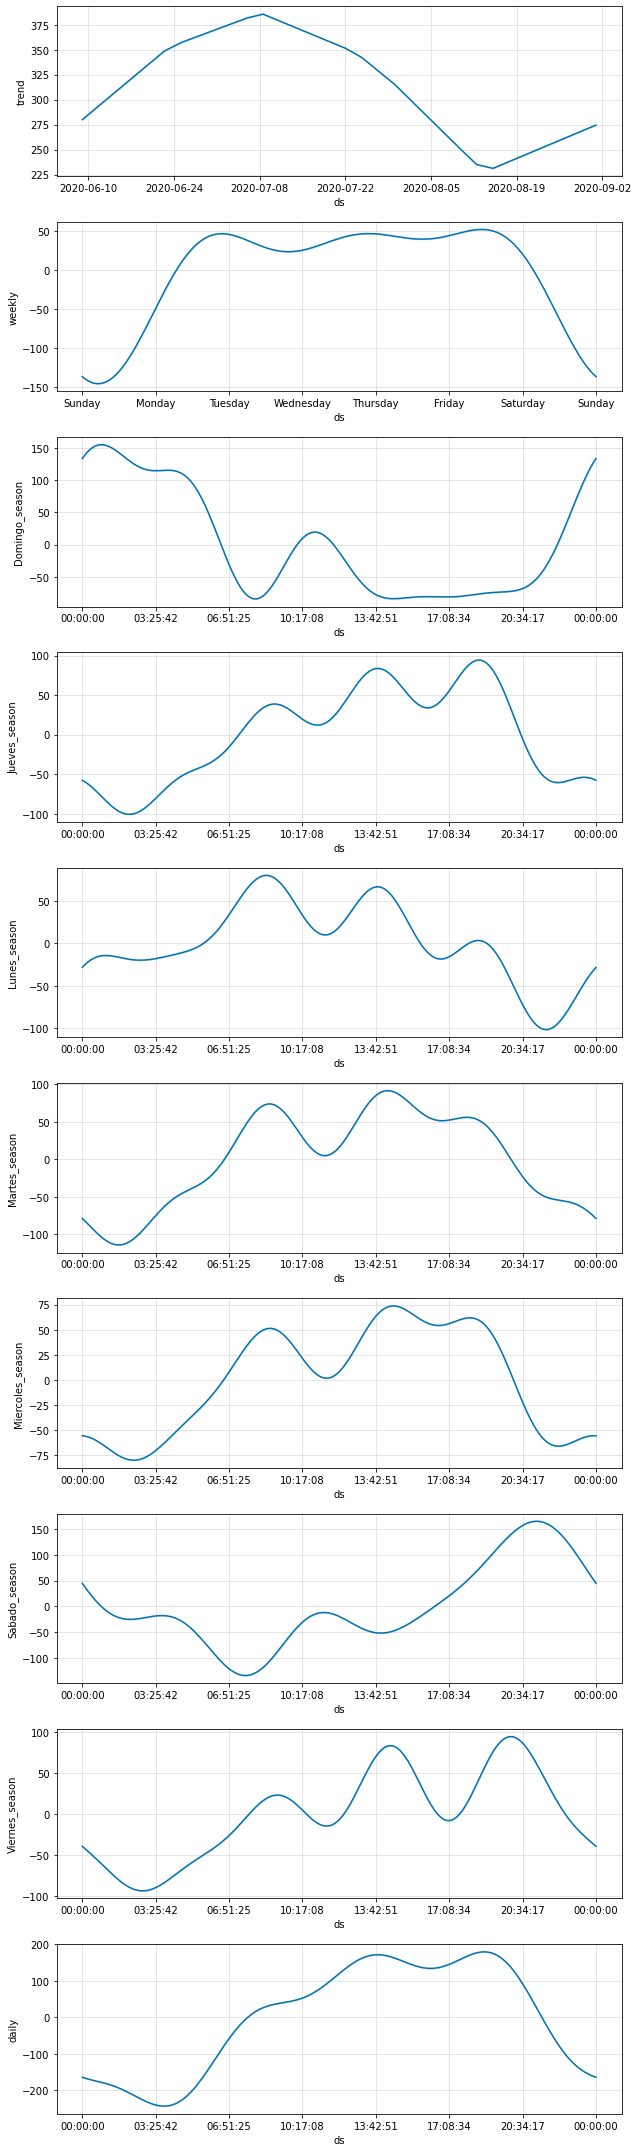

In [24]:
fig, predictions_rolling = rolling_forecast()

In [25]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_N = test_data_N.set_index('ds')

In [26]:
residuals_rolling = test_data_N['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,62.834484
2020-08-31 01:00:00,48.601883
2020-08-31 02:00:00,44.893839
2020-08-31 03:00:00,85.626000
2020-08-31 04:00:00,61.585918


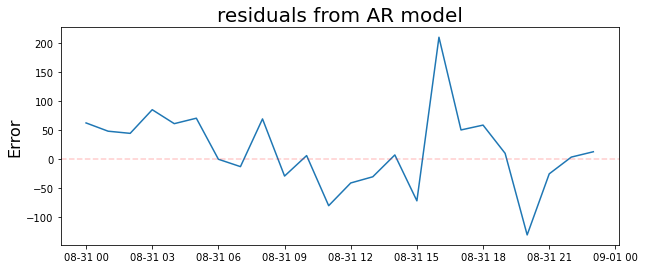

In [27]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

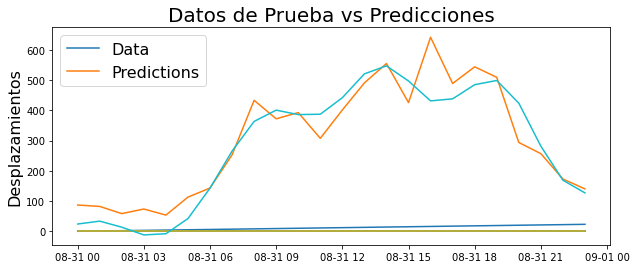

In [28]:
plt.figure(figsize=(10,4))
plt.plot(test_data_N)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [29]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_N['y'])),4))

Mean Absolute Percent Error: 0.298


# RMSE

In [30]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_N.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    68.486659
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


68.48665913775123

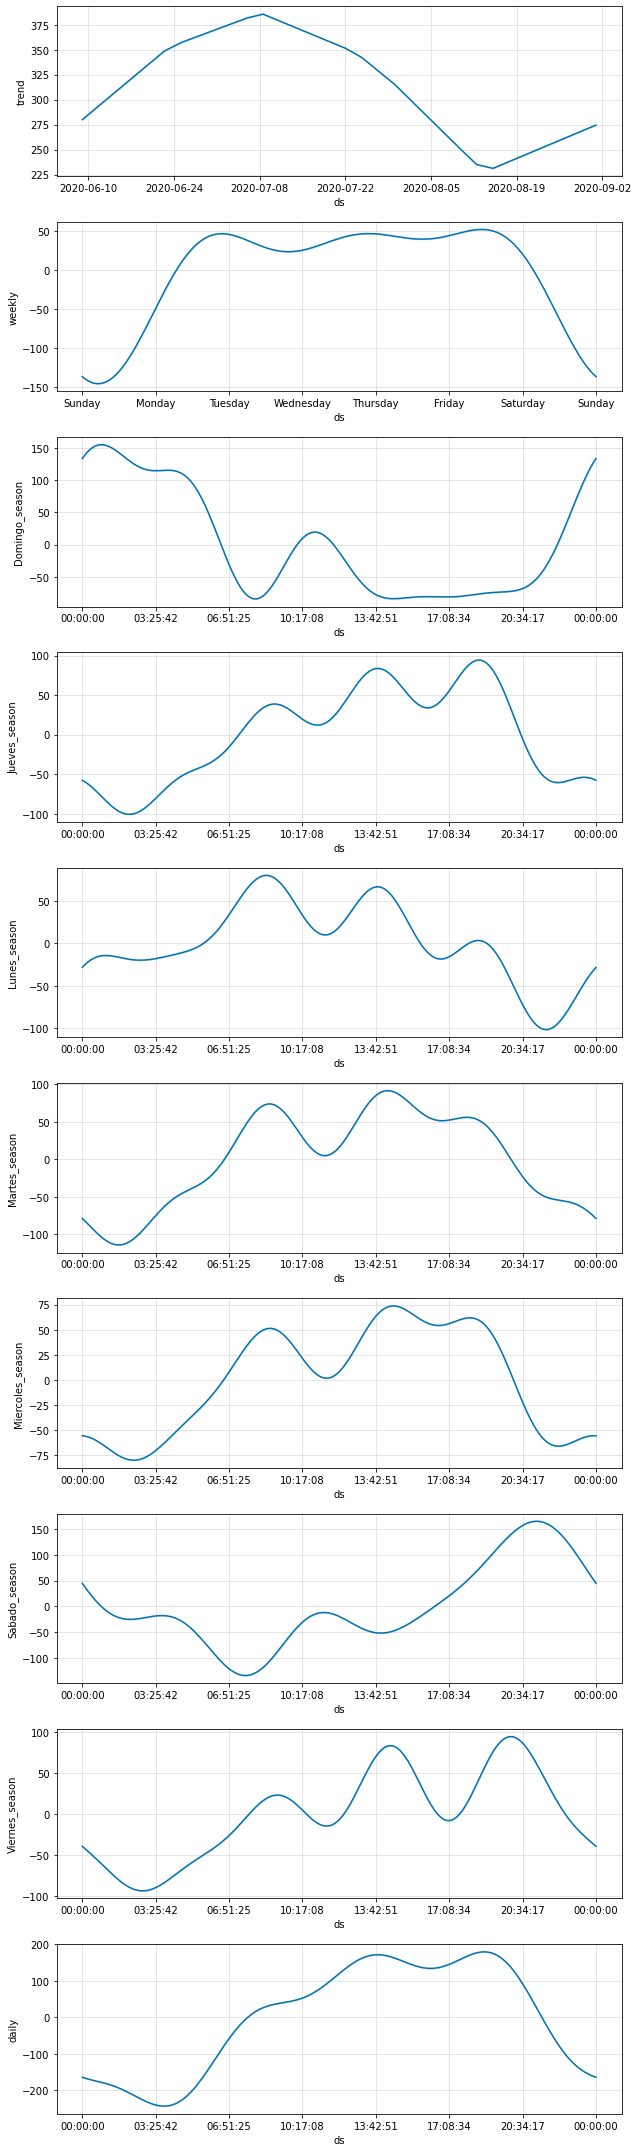

In [31]:
fig

# Graficas de Patrones 
## Desescalada

In [32]:
Patron3AM_D = Patron3AM_D.set_index('ds')
Patron8AM_D = Patron8AM_D.set_index('ds')
Patron14PM_D = Patron14PM_D.set_index('ds')
Patron16PM_D = Patron16PM_D.set_index('ds')

Patron3AM_N = Patron3AM_N.set_index('ds')
Patron8AM_N = Patron8AM_N.set_index('ds')
Patron14PM_N = Patron14PM_N.set_index('ds')
Patron16PM_N = Patron16PM_N.set_index('ds')

NameError: name 'Patron3AM_D' is not defined

In [ ]:
Patron3AM_N[Patron3AM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 3 AM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron8AM_N[Patron8AM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 8 AM')
#plt.xlim([pd.to_datetime('2020-08-23 00:00:00'), pd.to_datetime('2020-08-25 23:00:00')])
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron14PM_N[Patron14PM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 2 PM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron16PM_N[Patron16PM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 4 PM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Nota: Creo que se puede mejorar la predicción si se ajusta el patrón tal cual como se ve en la linea de tiempo (123) y se entrena periodos concretos como desescalada y nueva normalidad.
# Con el in de avanzar propongo que muestre los resultados que has obtenido hasta ahora y lo siguiente es tratar de hacer una simulación implementando un regresor. 
# Aunque la imagen de los patrones no corresponda con la gráfica de patrones original, de todas formas está bien entrenado.